<a href="https://colab.research.google.com/github/BenUCL/BenUCL/blob/main/AI4Environment_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Viewing this on Github? Click 'Open in Colab' to start!

# **Week 1 Colab notebook**

# In this weeks Colab notebook we will learn all the basics of Google Colaboratory which will be needed for this module, including:


1. How to create and save your own notebooks
2. How to run some simple code
3. How to install and import packages
4. How to download datasets from online repositories
5. How to connect and access data in your Google Drive account
6. How to access Colabs free GPU feature
7. Saving outputs

Future labs will be run in Colab so this will help get you up to speed. There are plenty of other resources online which can help you learn more should you need, here is a good starting point: https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=-Rh3-Vt9Nev9




# 1. How to create and save your own notebooks

You likely accessed this notebook from the course github page. This has created a frozen copy of the notebook which will not be saved once you exit. 

To create your own copy, got to 'File' -> 'Save a copy in Drive'.

This will open a new notebook called 'Copy of AI4Environment Week 1.ipynb' which has automatically been saved to your Google Drive. You can go to your Google Drive and move this to an appropriate folder.

You can also click on the name and remove the 'Copy of' prefix. 

# 2. How to run some simple code

Click on this cell then hit the '+ Code' button to add a new code cell below.

Copy in: 'print("I am coding in Colab")' and hit the run button. The output will appear below.

You can also use the shift + enter shortcut to run code cells.

Now we'll run some other simple code examples. Some cells will print an output below your cell, others won't, can you see why this is?

In [ ]:
a = 10
a

In [ ]:
b = 5

In [ ]:
c = b*a

In [ ]:
print(c)

# 3. How to install and import packages

You will almost always need to work with packages. Colab comes with many of the most common packages preinstalled which saves you the time needed to install these.

We can see these using following line. Placing an '!' before code means this will be run as a shell command. 

In [ ]:
! pip list

To import a package which has been installed you simply need to run a code cell with 'import yourpackage', often with an abbreviated name using 'as', for example:

In [ ]:
import numpy as np

Note, each of these packages comes with an existing version. Sometimes you may need different versions of these packages (e.g when copying older code or using more specialised packages that require specific versions of supporting packages).

To fix this, you can reinstall a different version of the package. For example: 

In [ ]:
# see what version of the numpy package is installed

print(np.__version__)

In [ ]:
# install a different version of this package

! pip install numpy==1.19

In [ ]:
import numpy as np

Note the incompatibility warnings above. These indicate that this version of numpy may not work with all the installed packages listed in these warnings.

To install an entirely new package we typically use the same '! pip' code. Here we will install, the UMAP package, a data dimensionality reduction and visualisation tool: https://umap-learn.readthedocs.io/en/latest/index.html

In [ ]:
! pip install umap-learn

# **4. How to download datasets from online repositories**


There are multiple ways to access data and this data can come in different formats (e.g raw, zipped). Broadly, in Colab you can access data in two ways: download data from an online repository or access data you have stored on your Google Drive account.

### Downloading from an external repository

As an example of the first we will use the FMNIST dataset, a dataset of which contains 70,000 grayscale images in 10 categories. This is often used for testing new machine learning algorithms or for teaching purposes (more detail here: https://github.com/zalandoresearch/fashion-mnist) 

The git clone command will download the fashion-mnist repository from GitHub to your local machine. The repository contains code for working with the FMNIST dataset in Python.

In [ ]:
# Clone the Github repository where the dataset is stored

! git clone https://github.com/zalandoresearch/fashion-mnist.git

You should now see in the 'Files' tab on the left a new folder called 'fashion-mnist' has been added (you may need to hit the 'Refresh' option in the 'Files' tab).

Inside this folder navigate to 'data' -> 'fashion'. There are four files here. We can see these are compressed due to the '.gz', this is a common practice. We'll unzip the 'train-images-idx3-ubyte.gz' file. To do this, click the three dots next to this and select 'copy path'. Now copy this in place of the 'COPY PATH HERE' string at line eight below:

In [ ]:
""" Import the necessary libraries, note these libraries are preinstalled as 
they are commonly used so we can import without installing"""
import gzip
import matplotlib.pyplot as plt
from PIL import Image

# Open the compressed file
with gzip.open('COPY PATH HERE', 'rb') as f:
  # Read the file header
  header = f.read(4)
  # Read the number of images
  num_images = int.from_bytes(f.read(4), 'big')
  # Read the number of rows
  num_rows = int.from_bytes(f.read(4), 'big')
  # Read the number of columns
  num_cols = int.from_bytes(f.read(4), 'big')
  # Read the image data
  data = f.read()

This has stored the dataset in the 'data' variable. We can now view some examples from this directly in colab.

In [ ]:
# Convert the image data to a NumPy array
import numpy as np
im_array = np.frombuffer(data, dtype=np.uint8).reshape(num_images, num_rows, num_cols)

# Select the first image from the array
im = im_array[0] # change this value to view different samples

# Convert the image to a PIL image
im = Image.fromarray(im)

# Display the image
plt.imshow(im, cmap='gray')
plt.show()


# **5. How to connect and access data in your Google Drive account**

Downloading datasets and packages to a Colab instance can be effective. However, your Colab instance will be lost after a period of inactivity (approx. 90min). As long as you hit save, your code and its ouputs will be viewable in the notebook. However, all variables, packages and data stored in memory will be lost - you'll have to install, download and run all this again from the start when reconnecting.

Downloading data is often the most time consuming process when reconnecting. A second option for accessing data on colab is accessing data stored on your GDrive account. To do this, we first need to connect your GDrive account to this Colab instance. You can use the following code, or the 'Mount Drive' option inside the 'Files' tab.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[link text](https:// [link text](https://))You should now see the 'drive' folder added in your 'Files' tab. 

Next up, we need to place some data in your GDrive. This can be done by uploading it yourself. You can then access the file path and use this as we did above.

However, on this occasion we'll use another option which is linking to a publically available folder in another GDrive. The one we'll be using is a dataset of 152 one-minute soundscape recordings from coral reefs used in the publication: https://doi.org/10.1016/j.ecolind.2022.108986

This dataset is  stored in the public GDrive folder: https://drive.google.com/drive/folders/1Chs_Y9nt4XBy28ZWAK3TPzyNhT3E26O1?usp=share_link

Open this link and select the 'Add shortcut to Drive' option. This should now be available in your 'drive' folder in the 'Files' tab of Colab.

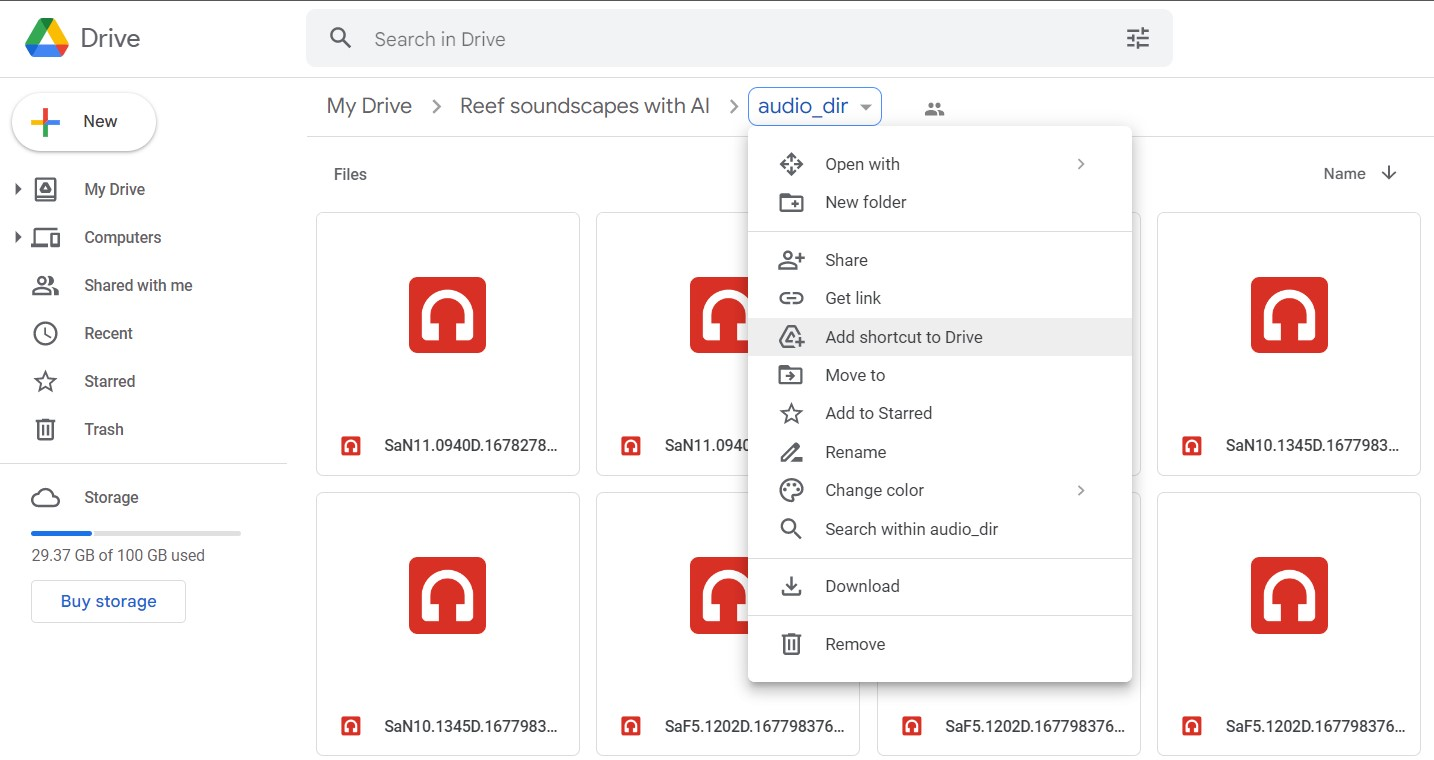


We can listen to these files in Colab. Copy the path of one of these files below and have a listen (note these particular recordings are quiet so headphones may be needed to hear them clearly).

In [ ]:
from IPython.display import Audio
audio_file = 'COPY PATH HERE'
wn = Audio(audio_file, autoplay=True)
display(wn)

We can also plot its spectrogram

In [ ]:
# imports

import librosa
import librosa.display

# load the audio file

y, sample_rate = librosa.load(audio_file)

# Short-time Fourier transform (STFT).
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
print('Shape of D object:', np.shape(D))

# Convert amplitude spectrogram to Decibels-scaled spectrogram.

DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the spectogram.

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr=sample_rate, hop_length=512,
                         x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Decibels-scaled spectrogram', fontsize=20)
plt.show()

# **6. How to access Colabs free GPU feature**

An added bonus of using Google Colab is that you can get free access (with limits) to a GPU for accelerated processing - useful for deep learning or other tasks reliant on extensive matrix multiplications. You can read more about the limits under the 'Resource Limits' heading here: https://research.google.com/colaboratory/faq.html

First lets see if you have a GPU enabled, this should currently be false:

In [ ]:
import torch

torch.cuda.is_available()

To access a GPU you must change your runtime type. This can be done by selecting 'Runtime' -> 'Change runtime type' -> 'Hardware accelerator' -> 'GPU'.

This will delete your current instance and restart a new one on a GPU so be sure to do this before you install any packages and download data (you will see that your GDrive and data folders we added are now gone).

Now, you've changed runtime type to a GPU rerun the above code cell to see if it now returns True. Occasionally you may not be allocated a GPU, especially if you have made heavy use of this feature recently.

We can mock up a quick matrix multiplication task to compare the execution speed of a GPU compared to CPU:

In [ ]:
import time

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set dummy input data
input_data = torch.randn(10000, 10000).to(device)

# Time matrix multiplication
start_time = time.time()
output = input_data.matmul(input_data)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Make a note of the elapsed time. Now change your runtime back to a CPU by selecting 'None' and rerun the above code cell to see how long a CPU takes.

You will likely get different execution speeds to some peers when using a GPU, can you find out why online?

# **7. Saving your outputs**

Saving your work is easy. You can save a copy of this notebook in your GDrive using 'File' -> 'Save a copy in Drive', or, save this to your GitHub account using 'File' -> 'Save a copy in Github' - be sure to create an appropriate repository on your GitHub account where this can be saved.

If you wrote any outputs to a file these will be saved in the 'Files' tab and can be downloaded from here - be sure to do this if you are quitting a session or taking an extended break as any files will be deleted when your runtime disconnects. If you saved these to a folder in your GDrive they will automatically be saved there. 

# **Conclusion**

This notebook has given you a quick crash course in using Colab. We recommend colab and Google Drive as an excellent tool for running projects during this module and as a starting point for coding your own projects.

If you have some extra time, have a search online and see if you can find out more about when you may want to use Google Colab and when you may have to use other programming environments.

There are a huge number of existing Colab notebooks out there which you can look through, try out and adapt code from, here are some examples:
- Generate images from text prompts using Stable Diffusion: https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb
- Sound classification with YAMNet: 
https://www.tensorflow.org/hub/tutorials/yamnet
- Object detection from images with YOLO: 
https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb


